In [21]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import style
style.use("ggplot")
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA as sklearnPCA
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn import metrics
from scipy.spatial.distance import cdist

In [22]:
df = pd.read_csv('FRIENDSS07E01.mkv.embedding.txt', header = None, sep=" ")

print(len(df.columns))

colnames = ['timestamp', 'faceID']
for i in range(0,len(df.columns)-2):
    colnames.append(i)
df.columns = colnames
# print(df['faceID'])

Xdf = df.drop(['timestamp','faceID'], axis = 1)
# print(Xdf.head())

130


In [23]:
X = []
for i in range(0,len(Xdf.index)):
    X.append(np.array(Xdf.iloc[i]))
# print(X)
X = np.array(X)

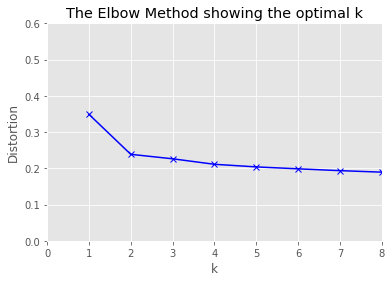

In [26]:
distortions = []
K = range(1,15)
for k in K:
    kmeanModel = KMeans(n_clusters=k, n_jobs = -1,max_iter=1000)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
 
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlim([0, 8])
plt.ylim([0, 0.6])
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()